<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Chicago_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sodapy

In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofchicago.org", None, timeout=100)

#Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 "N0amD6E3UkUmVTl5nFWXbIyl4",
                 username="anesumasube@gmail.com",
                 password="Marywandi11!", timeout=1000)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m6dm-c72p",limit=1000000, select='trip_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, tip, additional_charges, trip_total ')
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999955 non-null object
trip_miles                1000000 non-null object
pickup_community_area     942705 non-null object
dropoff_community_area    935811 non-null object
fare                      999999 non-null object
tip                       999999 non-null object
additional_charges        999999 non-null object
trip_total                999999 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999955 non-null object
trip_miles                1000000 non-null object
pickup_community_area     942705 non-null object
dropoff_community_area    935811 non-null object
fare                      999999 non-null object
tip                       999999 non-null object
additional_charges        999999 non-null object
trip_total                999999 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [0]:
results_df['trip_start_timestamp']= pd.to_datetime(results_df['trip_start_timestamp'])
results_df['trip_end_timestamp']= pd.to_datetime(results_df['trip_end_timestamp'])


for col in ['trip_miles','fare','tip','trip_total']:
    results_df[col]= results_df[col].astype(float)

In [8]:

results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,ee4ccea11cb1c96513bc1a156b30124e7f7d43e7,2019-01-16 07:00:00,2019-01-16 07:30:00,1776,7.670978,22,33,17.5,1.0,2.55,21.05
1,ee4ccff207cf1cdad77336c57bb1743073818ae0,2019-01-10 09:00:00,2019-01-10 09:00:00,554,1.738818,7,8,5.0,2.0,2.55,9.55
2,ee4cd01da4fdba25482ef9217a129430aab251f1,2019-03-15 14:30:00,2019-03-15 15:45:00,4534,40.223803,39,76,55.0,0.0,9.35,64.35
3,ee4cd03f9ac14523ffbf91ae68fd1536a33108d1,2019-03-15 19:30:00,2019-03-15 20:00:00,1944,17.329789,76,8,25.0,0.0,0,25.00
4,ee4cd1143fb053674d8c714ff015a6dc967210a1,2018-11-27 20:45:00,2018-11-27 20:45:00,229,0.663065,7,7,2.5,0.0,2.5,5.00


In [0]:
results_df['pickup_community_area'] = results_df['pickup_community_area'].fillna(0)

In [0]:
results_df['dropoff_community_area'] = results_df['dropoff_community_area'].fillna(0)

In [0]:

for col in ['pickup_community_area','dropoff_community_area','trip_seconds']:
    results_df[col]= results_df[col].astype(float)



In [12]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              999955 non-null float64
trip_miles                1000000 non-null float64
pickup_community_area     1000000 non-null float64
dropoff_community_area    1000000 non-null float64
fare                      999999 non-null float64
tip                       999999 non-null float64
additional_charges        999999 non-null object
trip_total                999999 non-null float64
dtypes: datetime64[ns](2), float64(7), object(2)
memory usage: 83.9+ MB


In [0]:
import seaborn as sns

In [14]:
results_df = results_df.drop(columns='trip_id')
results_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,2019-01-16 07:00:00,2019-01-16 07:30:00,1776.0,7.670978,22.0,33.0,17.5,1.0,2.55,21.05
1,2019-01-10 09:00:00,2019-01-10 09:00:00,554.0,1.738818,7.0,8.0,5.0,2.0,2.55,9.55
2,2019-03-15 14:30:00,2019-03-15 15:45:00,4534.0,40.223803,39.0,76.0,55.0,0.0,9.35,64.35
3,2019-03-15 19:30:00,2019-03-15 20:00:00,1944.0,17.329789,76.0,8.0,25.0,0.0,0,25.00
4,2018-11-27 20:45:00,2018-11-27 20:45:00,229.0,0.663065,7.0,7.0,2.5,0.0,2.5,5.00


In [15]:
results_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,2019-01-16 07:00:00,2019-01-16 07:30:00,1776.0,7.670978,22.0,33.0,17.5,1.0,2.55,21.05
1,2019-01-10 09:00:00,2019-01-10 09:00:00,554.0,1.738818,7.0,8.0,5.0,2.0,2.55,9.55
2,2019-03-15 14:30:00,2019-03-15 15:45:00,4534.0,40.223803,39.0,76.0,55.0,0.0,9.35,64.35
3,2019-03-15 19:30:00,2019-03-15 20:00:00,1944.0,17.329789,76.0,8.0,25.0,0.0,0,25.00
4,2018-11-27 20:45:00,2018-11-27 20:45:00,229.0,0.663065,7.0,7.0,2.5,0.0,2.5,5.00


In [0]:
results_df=results_df.drop(columns='additional_charges')

In [0]:
# results_df= results_df.drop(columns='tip')
# results_df.head()

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
results_df.to_csv('rideshare3.csv', index=False)

In [20]:
ride_data = pd.read_csv('rideshare3.csv')
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999955 non-null float64
trip_miles                1000000 non-null float64
pickup_community_area     1000000 non-null float64
dropoff_community_area    1000000 non-null float64
fare                      999999 non-null float64
tip                       999999 non-null float64
trip_total                999999 non-null float64
dtypes: float64(7), object(2)
memory usage: 68.7+ MB


In [0]:
ride_data['trip_start_timestamp']= pd.to_datetime(ride_data['trip_start_timestamp'])
ride_data['trip_end_timestamp']= pd.to_datetime(ride_data['trip_end_timestamp'])

In [0]:
ride_variables= ride_data[['trip_miles','trip_seconds','pickup_community_area','dropoff_community_area']]

In [23]:
ride_variables.head()

,trip_miles,trip_seconds,pickup_community_area,dropoff_community_area
0,7.670978,1776.0,22.0,33.0
1,1.738818,554.0,7.0,8.0
2,40.223803,4534.0,39.0,76.0
3,17.329789,1944.0,76.0,8.0
4,0.663065,229.0,7.0,7.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


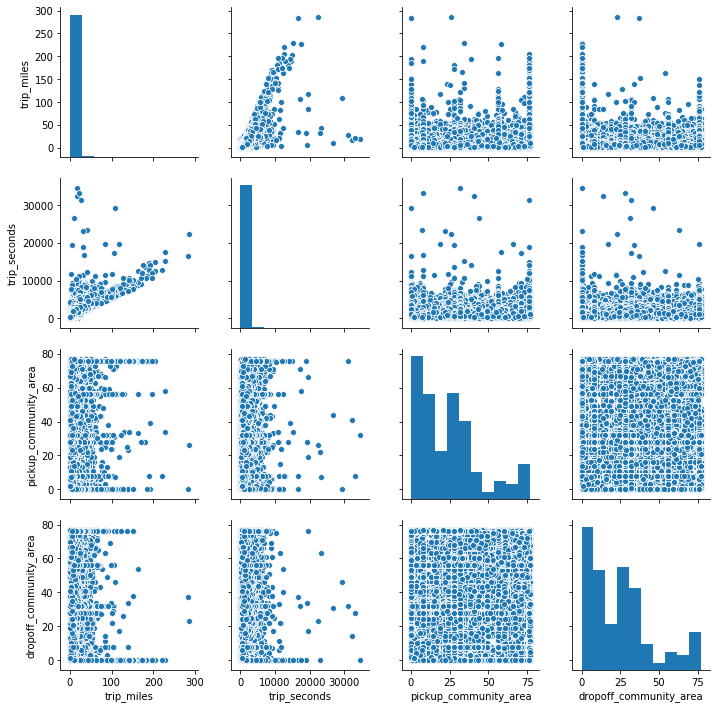

In [24]:
sns.pairplot(ride_variables)

In [25]:
ride_variables.corr()

,trip_miles,trip_seconds,pickup_community_area,dropoff_community_area
trip_miles,1.000000,0.806761,0.144162,0.137874
trip_seconds,0.806761,1.000000,0.094207,0.104509
pickup_community_area,0.144162,0.094207,1.000000,0.145266
dropoff_community_area,0.137874,0.104509,0.145266,1.000000


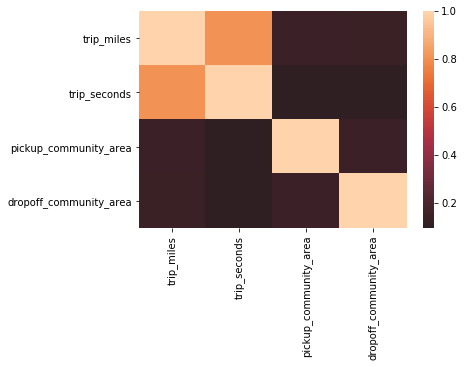

In [26]:

sns.heatmap(ride_variables.corr(), center=0)

In [27]:
ride_share = ride_data.iloc[:200000, :8]
ride_share.head()


,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip
0,2019-01-16 07:00:00,2019-01-16 07:30:00,1776.0,7.670978,22.0,33.0,17.5,1.0
1,2019-01-10 09:00:00,2019-01-10 09:00:00,554.0,1.738818,7.0,8.0,5.0,2.0
2,2019-03-15 14:30:00,2019-03-15 15:45:00,4534.0,40.223803,39.0,76.0,55.0,0.0
3,2019-03-15 19:30:00,2019-03-15 20:00:00,1944.0,17.329789,76.0,8.0,25.0,0.0
4,2018-11-27 20:45:00,2018-11-27 20:45:00,229.0,0.663065,7.0,7.0,2.5,0.0


In [28]:
ride_share['start_date'] = [d.date() for d in ride_share['trip_start_timestamp']]
ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,start_date
0,2019-01-16 07:00:00,2019-01-16 07:30:00,1776.0,7.670978,22.0,33.0,17.5,1.0,2019-01-16
1,2019-01-10 09:00:00,2019-01-10 09:00:00,554.0,1.738818,7.0,8.0,5.0,2.0,2019-01-10
2,2019-03-15 14:30:00,2019-03-15 15:45:00,4534.0,40.223803,39.0,76.0,55.0,0.0,2019-03-15
3,2019-03-15 19:30:00,2019-03-15 20:00:00,1944.0,17.329789,76.0,8.0,25.0,0.0,2019-03-15
4,2018-11-27 20:45:00,2018-11-27 20:45:00,229.0,0.663065,7.0,7.0,2.5,0.0,2018-11-27


In [29]:
ride_share['start_date'].max()

datetime.date(2019, 3, 31)

In [0]:
# from google.colab import drive
# drive.mount('drive')

In [0]:
# results_df.to_csv('ridedata.csv')
# !cp ridedata.csv "drive/My Drive/"

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# results_df.to_csv('ridedata.csv')
# !cp ridedata.csv "content/drive/My Drive/"

In [34]:
ride_share['start_day'] = [d.weekday() for d in ride_share['trip_start_timestamp']]

ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,start_date,start_day
0,2019-01-16 07:00:00,2019-01-16 07:30:00,1776.0,7.670978,22.0,33.0,17.5,1.0,2019-01-16,2
1,2019-01-10 09:00:00,2019-01-10 09:00:00,554.0,1.738818,7.0,8.0,5.0,2.0,2019-01-10,3
2,2019-03-15 14:30:00,2019-03-15 15:45:00,4534.0,40.223803,39.0,76.0,55.0,0.0,2019-03-15,4
3,2019-03-15 19:30:00,2019-03-15 20:00:00,1944.0,17.329789,76.0,8.0,25.0,0.0,2019-03-15,4
4,2018-11-27 20:45:00,2018-11-27 20:45:00,229.0,0.663065,7.0,7.0,2.5,0.0,2018-11-27,1


In [35]:
ride_share['start_time'] = [d.hour for d in ride_share['trip_start_timestamp']]
ride_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
trip_start_timestamp      200000 non-null datetime64[ns]
trip_end_timestamp        200000 non-null datetime64[ns]
trip_seconds              199993 non-null float64
trip_miles                200000 non-null float64
pickup_community_area     200000 non-null float64
dropoff_community_area    200000 non-null float64
fare                      200000 non-null float64
tip                       200000 non-null float64
start_date                200000 non-null object
start_day                 200000 non-null int64
start_time                200000 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 16.8+ MB


In [0]:
ride_share['time_block'] = ride_share['start_time']//3

In [37]:
ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,start_date,start_day,start_time,time_block
0,2019-01-16 07:00:00,2019-01-16 07:30:00,1776.0,7.670978,22.0,33.0,17.5,1.0,2019-01-16,2,7,2
1,2019-01-10 09:00:00,2019-01-10 09:00:00,554.0,1.738818,7.0,8.0,5.0,2.0,2019-01-10,3,9,3
2,2019-03-15 14:30:00,2019-03-15 15:45:00,4534.0,40.223803,39.0,76.0,55.0,0.0,2019-03-15,4,14,4
3,2019-03-15 19:30:00,2019-03-15 20:00:00,1944.0,17.329789,76.0,8.0,25.0,0.0,2019-03-15,4,19,6
4,2018-11-27 20:45:00,2018-11-27 20:45:00,229.0,0.663065,7.0,7.0,2.5,0.0,2018-11-27,1,20,6


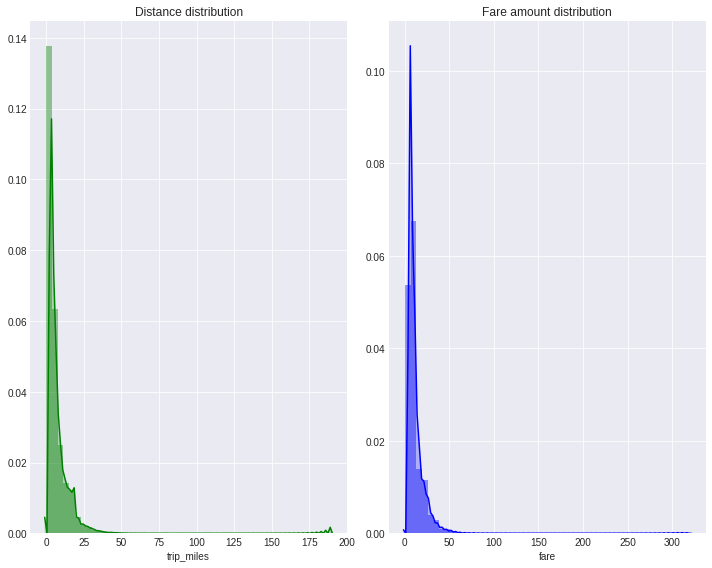

In [38]:
# set seaborn style with dark grid
plt.style.use('seaborn-darkgrid')

"""
- combine the distplots in one figure, customize the size

"""
f = plt.subplots(2,2,figsize=(10,8))
plt.subplot(1, 2, 1)
sns.distplot(ride_share['trip_miles'], kde=True, color="g", kde_kws={"shade": True}, label = 'trip-miles')
plt.title('Distance distribution')

plt.subplot(1, 2, 2)
sns.distplot(ride_share['fare'], kde=True, color="b", kde_kws={"shade": True}, label = 'fare-amount')
plt.title('Fare amount distribution')

plt.tight_layout()

Text(0, 0.5, 'fare-amount')

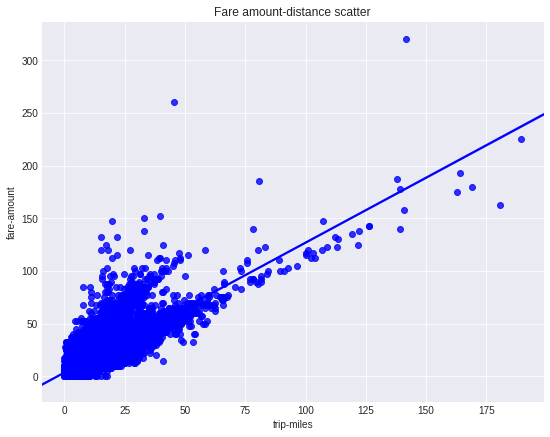

In [39]:
"""
- shuffle datframe, take the portion of 10000 rows
- use .corr() method to compute Pearson r for two variables in entire dataframe

"""

#sample = shuffle(ride_share)[0:10000]
# Create the plot object
fig, ax = plt.subplots(figsize=(9,7))

# Plot the data, set the size (s), color and transparency (alpha)
# of the points
sns.regplot(ride_share['trip_miles'], ride_share['fare'], color = 'b')


# Label the axes and provide a title
ax.set_title('Fare amount-distance scatter')
ax.set_xlabel('trip-miles')
ax.set_ylabel('fare-amount')
#print 'Pearson correlation: + str(round(ride_share['fare'].corr(ride_share['trip_miles']),2))

Text(0.5, 1.0, 'Mean fare amount per weekday day')

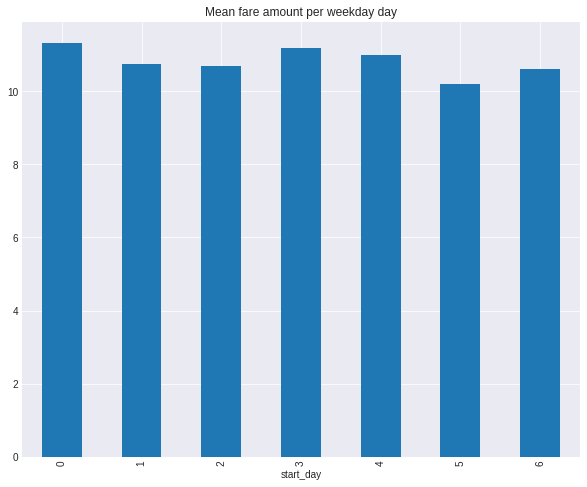

In [61]:
"""
- groupby data by pickup day and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('start_day')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per weekday day')


Text(0.5, 1.0, 'Mean fare amount per day')

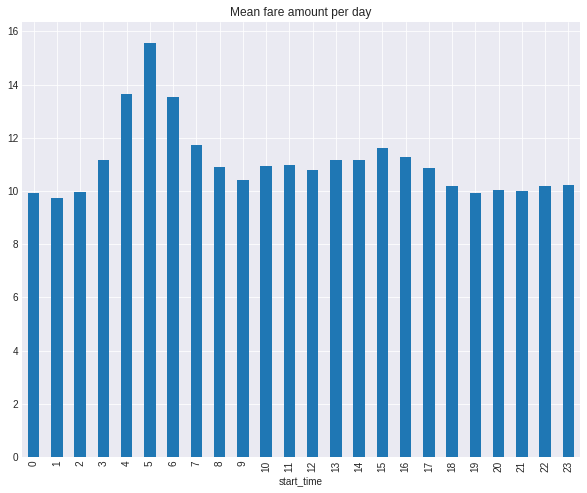

In [60]:
"""
- groupby data by pickup time and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('start_time')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per day')

In [0]:
ride_share['tip'] = ride_share['tip'].astype('int64')

Text(0.5, 1.0, 'Mean fare amount per day')

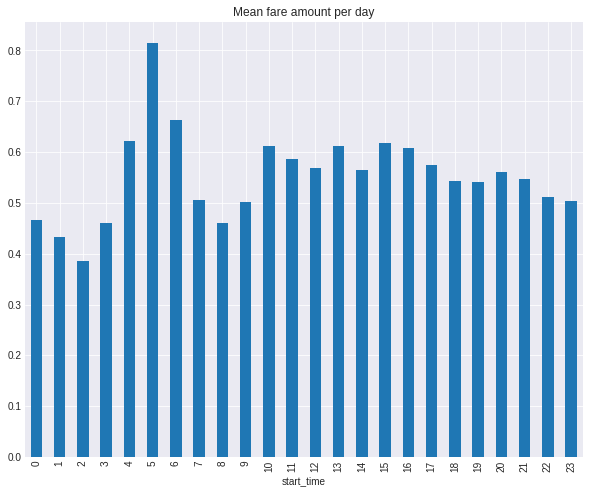

In [59]:
"""
- groupby data by tip and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('start_time')['tip'].mean().plot.bar()
ax.set_title('Mean fare amount per day')

Text(0.5, 1.0, 'Mean fare amount per day')

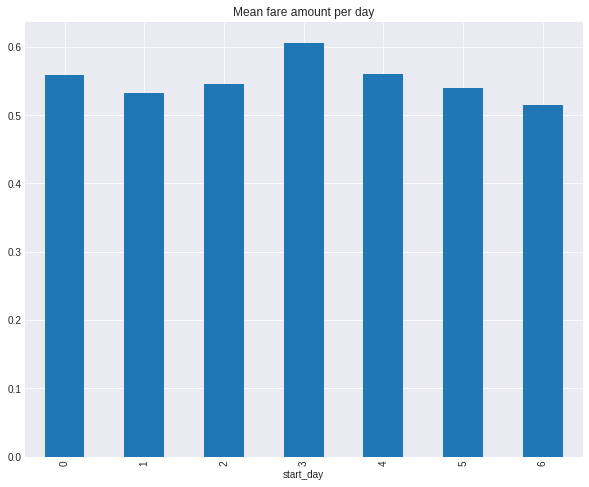

In [58]:
"""
- groupby data by tip and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('start_day')['tip'].mean().plot.bar()
ax.set_title('Mean fare amount per day')

Text(0.5, 1.0, 'Mean fare amount time block')

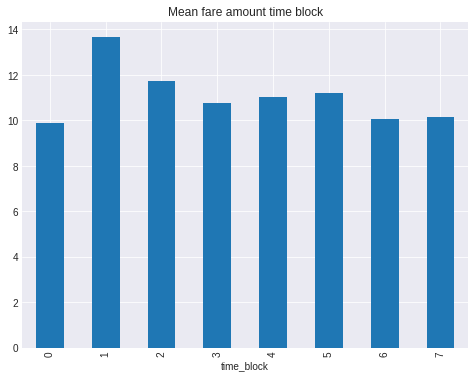

In [42]:
"""
- groupby data by pickup time block and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(8,6))
ride_share.groupby('time_block')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount time block')

Text(0.5, 1.0, 'Mean fare amount pickup area')

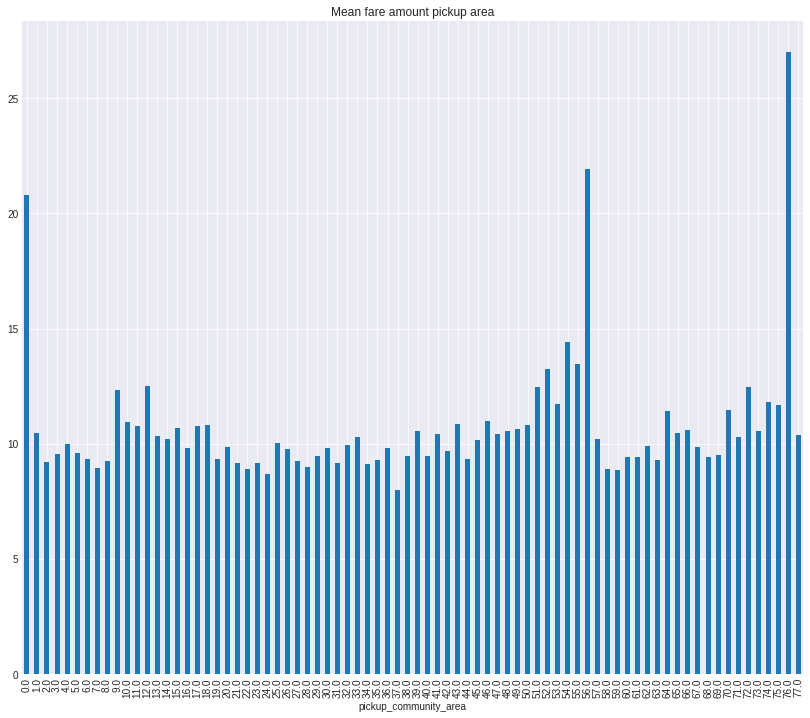

In [43]:
"""
- groupby data by pickup time area and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(14,12))
ride_share.groupby('pickup_community_area')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount pickup area')

In [44]:
ride_share['start_day'].value_counts()

4    35208
5    34497
3    28939
6    26377
2    25766
1    25745
0    23468
Name: start_day, dtype: int64

In [0]:
ride_share['pickup_community_area'] = ride_share['pickup_community_area'].astype('int64')

In [46]:
ride_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
trip_start_timestamp      200000 non-null datetime64[ns]
trip_end_timestamp        200000 non-null datetime64[ns]
trip_seconds              199993 non-null float64
trip_miles                200000 non-null float64
pickup_community_area     200000 non-null int64
dropoff_community_area    200000 non-null float64
fare                      200000 non-null float64
tip                       200000 non-null float64
start_date                200000 non-null object
start_day                 200000 non-null int64
start_time                200000 non-null int64
time_block                200000 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(1)
memory usage: 18.3+ MB


**One Hot Encode the categorical variables**

In [47]:
# assign the categorical variables to encode
X = ride_share[[ 'start_day', 'time_block', 'pickup_community_area']]
X.shape

(200000, 3)

In [0]:
# One hot encoding 
from sklearn import preprocessing

In [0]:

# Create One Hot Encoder Object

# 1 Instantiate thh variables

enc = preprocessing.OneHotEncoder()

# 2 Fit

enc.fit(X)

# 3 Transform

onehotlabels = enc.transform(X)

columns = enc.get_feature_names(input_features=X.columns)


X_df = pd.DataFrame(onehotlabels.todense(), columns=columns)


In [0]:


# X_df['trip_seconds'] = ride_df['trip_seconds']
# X_df.head()


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = ride_share['fare']

In [0]:
X_train , X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=12)

In [0]:
import statsmodels.api as sm

In [54]:
X_df = sm.add_constant(X_df)
est = sm.OLS(y, X_df).fit()
#predictions = est.predict(X_df)
est.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     616.9
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:56:38   Log-Likelihood:            -6.9976e+05
No. Observations:              200000   AIC:                         1.400e+06
Df Residuals:                  199909   BIC:                         1.401e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.4965      0.033    255.471      0.000       8.431       8.562
start_day_0                  1.3508      0.048     27.996      0.000       1.256       1.445
start_day_1                  0.9900      0.046     21.404      0.000       0.899       1.081
start_day_2                  0.9743      0.046     21.024      0.000       0.883       1.065
start_day_3                  1.4615      0.044     33.170      0.000       1.375       1.548
start_day_4                  1.4899      0.041     36.716      0.000       1.410       1.569
start_day_5                  1.2032      0.041     29.184      0.000       1.122       1.284
start_day_6                  1.0270      0.046     22.131      0.000       0.936       1.118
time_block_0                 0.2301      0.063      3.664      0.000       0.107       0.353
time_block_1                 3.4152      0.083     41.157      0.000       3.253       3.578
time_block_2                 1.8850      0.050     37.606      0.000       1.787       1.983
time_block_3                 0.7088      0.047     14.975      0.000       0.616       0.802
time_block_4                 0.8879      0.047     18.842      0.000       0.796       0.980
time_block_5                 1.1185      0.043     26.185      0.000       1.035       1.202
time_block_6                 0.0944      0.041      2.307      0.021       0.014       0.175
time_block_7                 0.1567      0.045      3.446      0.001       0.068       0.246
pickup_community_area_0     10.0545      0.085    118.480      0.000       9.888      10.221
pickup_community_area_1     -0.1603      0.166     -0.965      0.335      -0.486       0.165
pickup_community_area_2     -1.4522      0.197     -7.362      0.000      -1.839      -1.066
pickup_community_area_3     -0.9655      0.129     -7.499      0.000      -1.218      -0.713
pickup_community_area_4     -0.5406      0.175     -3.098      0.002      -0.883      -0.199
pickup_community_area_5     -0.9084      0.161     -5.639      0.000      -1.224      -0.593
pickup_community_area_6     -1.1452      0.080    -14.331      0.000      -1.302      -0.989
pickup_community_area_7     -1.5302      0.086    -17.727      0.000      -1.699      -1.361
pickup_community_area_8     -1.2504      0.061    -20.625      0.000      -1.369      -1.132
pickup_community_area_9      1.8269      0.622      2.935      0.003       0.607       3.047
pickup_community_area_10     0.2315      0.321      0.722      0.471      -0.397       0.860
pickup_community_area_11     0.1757      0.337      0.521      0.603      -0.486       0.837
pickup_community_area_12     1.8701      0.497      3.766      0.000       0.897       2.844
pickup_community_area_13    -0.2990      0.360     -0.831      0.406      -1.004       0.406
pickup_communi